<a href="https://colab.research.google.com/github/ChengCheLeeJimmy/Python-Taiwan-Stock-Exchange-twse-Web-Scraping/blob/main/%E5%AD%94%E4%BB%A4%E5%82%91%E8%80%81%E5%B8%AB%E3%80%90%E8%B2%A1%E9%87%91_X_%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90%E3%80%91%E8%82%A1%E7%A5%A8%E6%AD%B7%E5%8F%B2%E4%BA%A4%E6%98%93%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90_stock_twse(%E4%BD%9C%E6%A5%AD%E5%AE%8C%E6%88%90%E7%89%88%EF%BC%8C%E6%94%BE_Github).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import requests
import pandas as pd
import datetime
import time
import json
import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif']=['SimHei'] #顯示中文標籤
# plt.rcParams['axes.unicode_minus']=False #顯示正負號

In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-06-25 10:54:11--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.107.113, 142.251.107.138, 142.251.107.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.107.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g2qpjrludrka2m6qhjq0tiid8hrvgpa6/1687690425000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=2b93232d-b2f2-485f-acd0-f84b4689c500 [following]
--2023-06-25 10:54:15--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g2qpjrludrka2m6qhjq0tiid8hrvgpa6/1687690425000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=2b93232d-b2f2-485f-acd0-f84b4689c500
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.98.132, 2607:f8b0:400c:c1a::84
Connecting to do

In [ ]:
def transform_data(data):
    # 民國轉西元
    y, m, d = data[0].split('/')
    new_date = '/'.join([str(int(y)+1911), m, d])
    data[0] = datetime.datetime.strptime(new_date, '%Y/%m/%d')
    # 把千進位的逗點去除、轉型態
    data[1] = int(data[1].replace(',', ''))
    data[2] = int(data[2].replace(',', ''))
    data[3] = float(data[3].replace(',', ''))
    data[4] = float(data[4].replace(',', ''))
    data[5] = float(data[5].replace(',', ''))
    data[6] = float(data[6].replace(',', ''))
    data[7] = float(0.0 if data[7].replace(',', '') == 'X0.00' else data[7].replace(',', ''))  # "+-": 漲跌, "X": 不比價
    data[8] = int(data[8].replace(',', ''))
    return data

def fetch_data(date, stock_no):
    quotes = []
    url = f'http://www.twse.com.tw/exchangeReport/STOCK_DAY?date={date}&stockNo={stock_no}'
    try:
        res = requests.get(url)
        data = res.json()
        data = [transform_data(d) for d in data['data']]
        print(f'Fetched data successfully. (Stock Number: {stock_no}, Date: {date})')
        return data
    except ConnectionRefusedError as cre:
        print("Connection Refuesed. TWSE website is not working.")
        return None
    except Exception as e:
        print(e)
        return None

def download_data(date,stock_no):
    data = fetch_data(date, stock_no)
    if data != None:
        data = pd.DataFrame(data)
                        #"日期","成交股數","成交金額","開盤價","最高價","最低價","收盤價","漲跌價差","成交筆數"
        data.columns = ['date', 'shares', 'amount', 'open', 'high', 'low', 'close', 'change', 'turnover']
        fname = f'{stock_no}_{date[:-2]}.csv'
        data.to_csv(fname, index=False)
        print(f'{fname} downloaded successfully.')
    return data


In [ ]:
# https://www.twse.com.tw/zh/trading/historical/stock-day.html
download_data('20200901','2330')

Fetched data successfully. (Stock Number: 2330, Date: 20200901)
2330_202009.csv downloaded successfully.


,date,shares,amount,open,high,low,close,change,turnover
0,2020-09-01,50129577,21681382412,430.0,435.0,428.0,435.0,8.5,17137
1,2020-09-02,42013407,18268716092,441.0,441.0,430.5,433.0,-2.0,20242
2,2020-09-03,40683617,17768951582,439.5,439.5,433.5,436.0,3.0,17810
3,2020-09-04,51349911,22051596821,427.0,432.5,427.0,429.0,-7.0,27893
4,2020-09-07,39854584,17060627028,428.0,432.5,425.0,426.0,-3.0,20003
5,2020-09-08,23714670,10208232440,428.0,433.0,427.5,431.0,5.0,12440
6,2020-09-09,40727362,17312991408,425.0,428.0,423.0,427.0,-4.0,21740
7,2020-09-10,35281921,15275112115,432.5,435.0,430.5,435.0,8.0,18244
8,2020-09-11,34893469,15171902036,435.5,436.5,432.5,436.5,1.5,14647
9,2020-09-14,39325833,17282659859,436.0,442.0,435.5,441.0,4.5,19854


In [ ]:
type(download_data('20200901','2330'))

Fetched data successfully. (Stock Number: 2330, Date: 20200901)
2330_202009.csv downloaded successfully.


pandas.core.frame.DataFrame

In [ ]:
download_data('20200901','2330')['close']

Fetched data successfully. (Stock Number: 2330, Date: 20200901)
2330_202009.csv downloaded successfully.


0     435.0
1     433.0
2     436.0
3     429.0
4     426.0
5     431.0
6     427.0
7     435.0
8     436.5
9     441.0
10    445.0
11    458.0
12    448.5
13    444.0
14    440.0
15    437.0
16    433.5
17    423.0
18    424.0
19    431.5
20    431.0
21    433.0
Name: close, dtype: float64

In [ ]:
download_data('20200901','2330')['date']

Fetched data successfully. (Stock Number: 2330, Date: 20200901)
2330_202009.csv downloaded successfully.


0    2020-09-01
1    2020-09-02
2    2020-09-03
3    2020-09-04
4    2020-09-07
5    2020-09-08
6    2020-09-09
7    2020-09-10
8    2020-09-11
9    2020-09-14
10   2020-09-15
11   2020-09-16
12   2020-09-17
13   2020-09-18
14   2020-09-21
15   2020-09-22
16   2020-09-23
17   2020-09-24
18   2020-09-25
19   2020-09-28
20   2020-09-29
21   2020-09-30
Name: date, dtype: datetime64[ns]

Fetched data successfully. (Stock Number: 2330, Date: 20200901)
2330_202009.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2330, Date: 20200901)
2330_202009.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2330, Date: 20200901)
2330_202009.csv downloaded successfully.


Text(0.5, 1.0, '台股證交所股價資料')

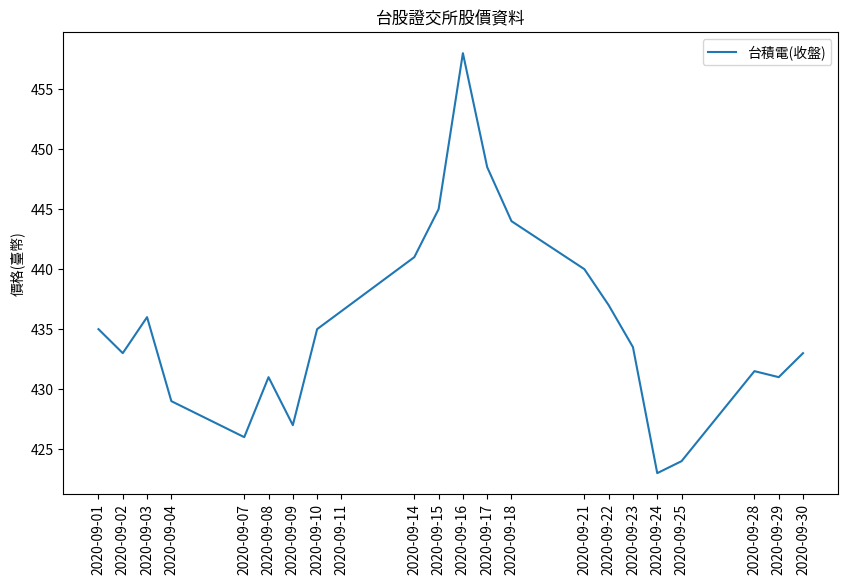

In [ ]:
# 資料視覺化，繪製 2020 年 9 月台積電的收盤價折線圖

plt.figure(figsize=(10, 6))
plt.plot(download_data('20200901','2330')['date'], download_data('20200901','2330')['close'], label='台積電(收盤)')
plt.xticks(ticks = download_data('20200901','2330')['date'], rotation='vertical')
plt.legend(loc='best')
plt.ylabel(ylabel='價格(臺幣)')
plt.title(label='台股證交所股價資料')

Fetched data successfully. (Stock Number: 2330, Date: 20200901)
2330_202009.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2330, Date: 20200901)
2330_202009.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2330, Date: 20200901)
2330_202009.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2330, Date: 20200901)
2330_202009.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2330, Date: 20200901)
2330_202009.csv downloaded successfully.


Text(0.5, 1.0, '台股證交所股價資料')

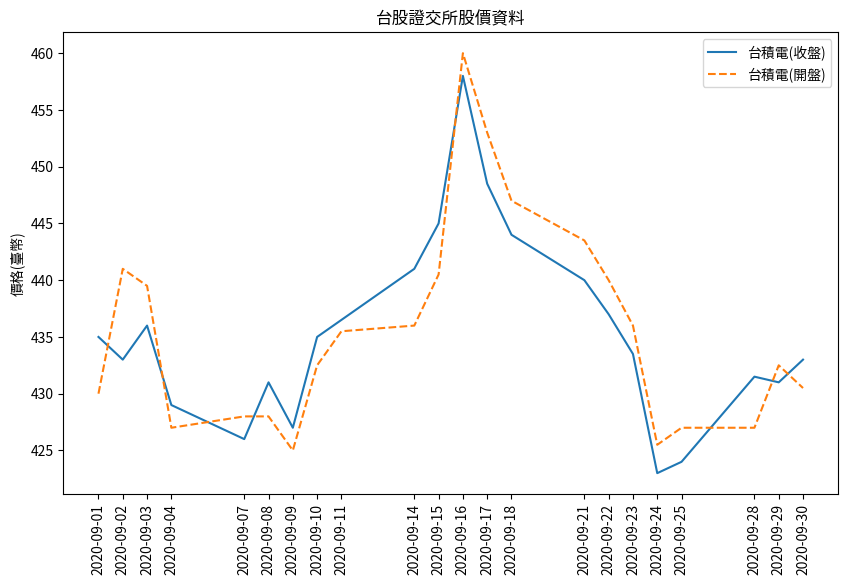

In [ ]:
# 資料視覺化，繪製 2020 年 9 月台積電的開盤、收盤價折線圖

plt.figure(figsize=(10, 6))
plt.plot(download_data('20200901','2330')['date'], download_data('20200901','2330')['close'], label='台積電(收盤)')
plt.plot(download_data('20200901','2330')['date'], download_data('20200901','2330')['open'], label='台積電(開盤)', linestyle='dashed')
plt.xticks(ticks = download_data('20200901','2330')['date'], rotation='vertical')
plt.legend(loc='best')
plt.ylabel(ylabel='價格(臺幣)')
plt.title(label='台股證交所股價資料')

Fetched data successfully. (Stock Number: 2454, Date: 20200901)
2454_202009.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2454, Date: 20200901)
2454_202009.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2454, Date: 20200901)
2454_202009.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2454, Date: 20200901)
2454_202009.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2330, Date: 20200901)
2330_202009.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2330, Date: 20200901)
2330_202009.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2330, Date: 20200901)
2330_202009.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2330, Date: 20200901)
2330_202009.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2330, Date: 20200901)
2330_202009.csv downloaded successfully.


Text(0.5, 1.0, '台股證交所股價資料')

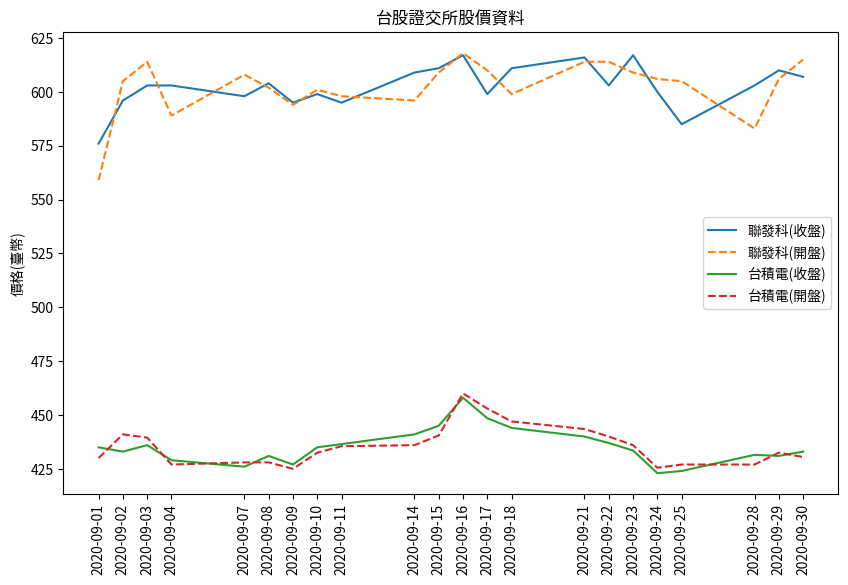

In [ ]:
# 資料視覺化，繪製 2020 年 9 月台積電及聯發科（股票代碼：2454）的開盤、收盤價折線圖

plt.figure(figsize=(10, 6))

plt.plot(download_data('20200901','2454')['date'], download_data('20200901','2454')['close'], label='聯發科(收盤)')
plt.plot(download_data('20200901','2454')['date'], download_data('20200901','2454')['open'], label='聯發科(開盤)', linestyle='dashed')
plt.plot(download_data('20200901','2330')['date'], download_data('20200901','2330')['close'], label='台積電(收盤)')
plt.plot(download_data('20200901','2330')['date'], download_data('20200901','2330')['open'], label='台積電(開盤)', linestyle='dashed')

plt.xticks(ticks = download_data('20200901','2330')['date'], rotation='vertical')
plt.legend(loc='best')
plt.ylabel(ylabel='價格(臺幣)')
plt.title(label='台股證交所股價資料')

In [ ]:
def twodigit(n):
  if n < 10:
    string = '0' + str(n)
  else:
    string = str(n)
  return string

In [ ]:
# 基礎數據分析，下載 1 - 12 月資料（間隔 3 秒）

for i in range(1,13):
    download_data(f'2020{twodigit(i)}01','2330')
    time.sleep(3)

Fetched data successfully. (Stock Number: 2330, Date: 20200101)
2330_202001.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2330, Date: 20200201)
2330_202002.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2330, Date: 20200301)
2330_202003.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2330, Date: 20200401)
2330_202004.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2330, Date: 20200501)
2330_202005.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2330, Date: 20200601)
2330_202006.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2330, Date: 20200701)
2330_202007.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2330, Date: 20200801)
2330_202008.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2330, Date: 20200901)
2330_202009.csv downloaded successfully.
Fetched data successfully. (Stock Number: 2330, Date: 2

In [ ]:
# https://www.askpython.com/python-modules/pandas/combine-csv-files-using-python
# https://stackoverflow.com/questions/6773584/how-are-glob-globs-return-values-ordered
import glob

# list all csv files only
csv_files = sorted(glob.glob('*.{}'.format('csv')))
csv_files

['2330_202001.csv',
 '2330_202002.csv',
 '2330_202003.csv',
 '2330_202004.csv',
 '2330_202005.csv',
 '2330_202006.csv',
 '2330_202007.csv',
 '2330_202008.csv',
 '2330_202009.csv',
 '2330_202010.csv',
 '2330_202011.csv',
 '2330_202012.csv']

In [ ]:
# 基礎數據分析，讀取 1 - 12 月 csv 並合併

df_csv_append = pd.DataFrame()

# append the CSV files
for file in csv_files:
    df = pd.read_csv(file)
    df_csv_append = df_csv_append.append(df, ignore_index=True)

df_csv_append

<ipython-input-28-02e006097758>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_csv_append = df_csv_append.append(df, ignore_index=True)
<ipython-input-28-02e006097758>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_csv_append = df_csv_append.append(df, ignore_index=True)
<ipython-input-28-02e006097758>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_csv_append = df_csv_append.append(df, ignore_index=True)
<ipython-input-28-02e006097758>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_csv_append = df_csv_append.append(df, ignore_index=True)
<ipython-input-28-02e006097758>:6: FutureWarning: The frame.append method is dep

,date,shares,amount,open,high,low,close,change,turnover
0,2020-01-02,33282120,11224165450,332.5,339.0,332.5,339.0,8.0,17160
1,2020-01-03,42023268,14295651580,344.0,345.0,335.5,339.5,0.5,20545
2,2020-01-06,45677057,15210531318,333.0,334.5,332.0,332.0,-7.5,22944
3,2020-01-07,51746181,17053282011,332.5,333.0,326.5,329.5,-2.5,22362
4,2020-01-08,37913748,12484410088,325.0,333.0,325.0,329.5,0.0,18228
...,...,...,...,...,...,...,...,...,...
240,2020-12-25,12581145,6449612552,514.0,515.0,510.0,511.0,1.0,14988
241,2020-12-28,19520886,10023145125,512.0,515.0,509.0,515.0,4.0,16675
242,2020-12-29,20226736,10409159045,515.0,517.0,513.0,515.0,0.0,17187
243,2020-12-30,46705107,24306881615,516.0,525.0,514.0,525.0,10.0,33173


In [ ]:
type(df_csv_append)

pandas.core.frame.DataFrame

In [ ]:
df_csv_append.to_csv('2330_2020_year_data.csv')

In [ ]:
# 基礎數據分析，計算 2020 年 1 - 12 月共有幾個營業日
len(df_csv_append)

245

In [ ]:
# 基礎數據分析，計算 2020 年 1 - 12 月每個月各有幾個營業日

2020 年 1 - 12 月每個月各有幾個營業日？
12月： 23天
11月： 21天
10月： 19天
09月： 22天
08月： 21天
07月： 23天
06月： 20天
05月： 20天
04月： 20天
03月： 22天
02月： 19天
01月： 15天


In [ ]:
# 基礎數據分析，計算 2020 年 1 - 12 月每個月各有幾個營業日

for i in range(1,13):
    download_data(f'2020{twodigit(i)}01','2330')['date']
    time.sleep(3)
    print('營業天數' + str(len(download_data(f'2020{twodigit(i)}01','2330')['date'])))

In [ ]:
# 基礎數據分析，計算 2020 年 1 - 12 月台積電各個月的累計成交股數

2020 年 1 - 12 月各個月的累計成交股數？
12月： 851356904
11月： 1027361779
10月： 741996408
09月： 959918823
08月： 1001180932
07月： 1468403011
06月： 902775975
05月： 890720889
04月： 946367569
03月： 1906813004
02月： 731761072
01月： 723936416


In [ ]:
# 基礎數據分析，計算 2020 年 1 - 12 月台積電各個月的累計成交股數

df = pd.read_csv('/content/2330_202001.csv')
df

,date,shares,amount,open,high,low,close,change,turnover
0,2020-01-02,33282120,11224165450,332.5,339.0,332.5,339.0,8.0,17160
1,2020-01-03,42023268,14295651580,344.0,345.0,335.5,339.5,0.5,20545
2,2020-01-06,45677057,15210531318,333.0,334.5,332.0,332.0,-7.5,22944
3,2020-01-07,51746181,17053282011,332.5,333.0,326.5,329.5,-2.5,22362
4,2020-01-08,37913748,12484410088,325.0,333.0,325.0,329.5,0.0,18228
5,2020-01-09,32397504,10890847940,335.0,337.5,333.5,337.5,8.0,16793
6,2020-01-10,27880115,9432320316,340.5,341.0,336.0,339.5,2.0,13296
7,2020-01-13,30663332,10455852739,342.0,342.0,339.0,341.5,2.0,13457
8,2020-01-14,30368993,10488360978,345.5,346.0,344.5,346.0,4.5,16339
9,2020-01-15,54575274,18590754206,345.0,345.0,337.5,340.0,-6.0,20392


In [ ]:
df['shares'].sum()

723936416

In [ ]:
for i in range(1,13):
  df = pd.read_csv(f'/content/2330_2020{twodigit(i)}.csv')
  print(f'{i}月累積成交股數: ' + str(df['shares'].sum()))

1月累積成交股數: 723936416
2月累積成交股數: 731761072
3月累積成交股數: 1906813004
4月累積成交股數: 946367569
5月累積成交股數: 890720889
6月累積成交股數: 902775975
7月累積成交股數: 1468403011
8月累積成交股數: 1001180932
9月累積成交股數: 959918823
10月累積成交股數: 741996408
11月累積成交股數: 1027361779
12月累積成交股數: 851356904
